# 대중교통 데이터 분석

## 데이터 수집
---

1. 티미니 홈페이지로 진입 https://pay.tmoney.co.kr/index.dev
2. 이용안내 클릭
3. 대중교통 통계자료 클릭
4. 월간 교통카드 통계자료 파일 다운

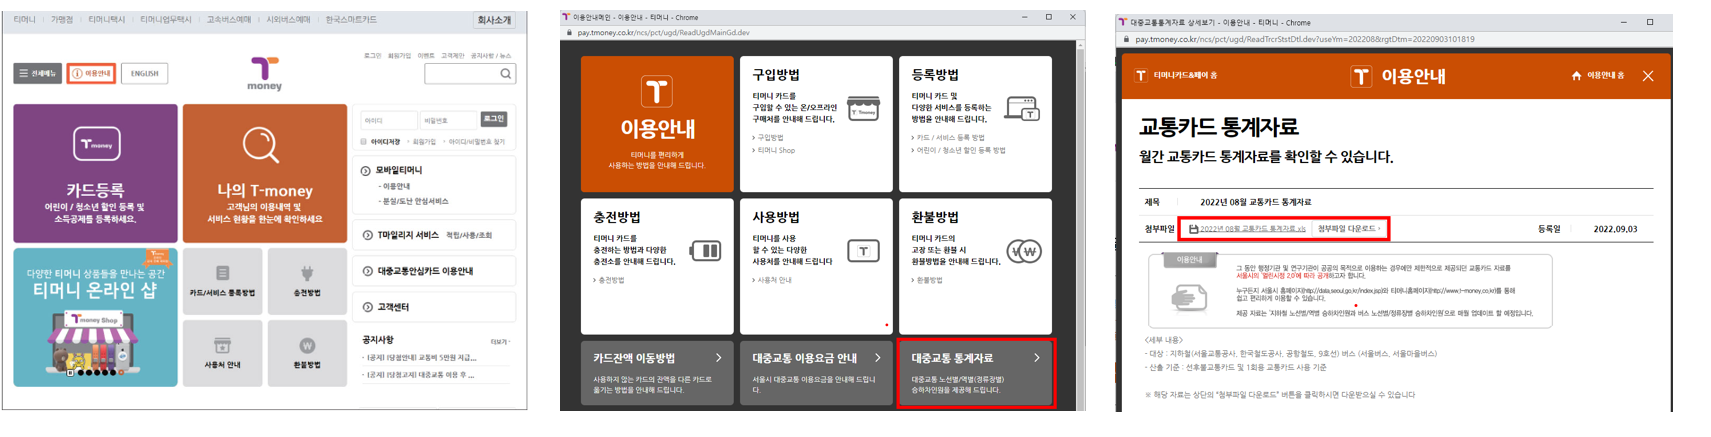

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
#from google.colab import drive
#drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
#%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 1. 데이터 확인
---

In [ ]:
#라이브러리 로드


In [ ]:
#데이터 로드


## 2. 유임 승차 비율이 가장 높은 역은 어디일까?
---
__유임 승차 비율이 가장 높은 역은 어디일까?__

이 질문을 해결하기 위한 알고리즘을 잠시 생각해보자. 

```
rate = 유임승차인원 / 무임승차인원 + 유임승차인원
```

1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 각 역의 비율(rate)를 계산한다. sort_values(by=)
3. 비율이 가장 높은 역을 찿는다.
4. 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.


In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# 데이터 로딩
df = pd.read_csv('./data/subwayfee.CSV.CSV', thousands=',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50
1,2023-06,1호선,151,시청,643718,653701,95097,93981,2023-07-03 08:56:50
2,2023-06,1호선,152,종각,939341,932306,144553,136786,2023-07-03 08:56:50
3,2023-06,1호선,153,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50
4,2023-06,1호선,154,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     614 non-null    object
 1   호선명     614 non-null    object
 2   역ID     614 non-null    int64 
 3   지하철역    614 non-null    object
 4   유임승차    614 non-null    int64 
 5   유임하차    614 non-null    int64 
 6   무임승차    614 non-null    int64 
 7   무임하차    614 non-null    int64 
 8   작업일시    614 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.3+ KB


In [48]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,614.000000,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,1924.058632,2.754875e+05,2.746448e+05,60283.765472,59612.382736
std,1206.574376,2.774772e+05,2.833062e+05,49018.489470,48664.899621
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1203.250000,9.460600e+04,8.907700e+04,25523.750000,26124.000000
50%,1822.500000,2.024105e+05,1.891765e+05,48049.500000,46517.500000
75%,2634.750000,3.629550e+05,3.657775e+05,77630.750000,76371.250000
max,4713.000000,2.123826e+06,2.092841e+06,304455.000000,295752.000000


In [47]:
df['유임승차']

0      1355284
1       643718
2       939341
3       483658
4       468448
        ...   
609      93507
610      33809
611      75516
612     204344
613      62350
Name: 유임승차, Length: 614, dtype: int64

## 유임승차 비율 구하기

In [49]:
result = df['유임승차'] / (df['유임승차'] + df['무임승차'])
result

0      0.864825
1      0.871284
2      0.866635
3      0.613691
4      0.641621
         ...   
609    0.717271
610    0.676979
611    0.759413
612    0.762947
613    0.599318
Length: 614, dtype: float64

In [50]:
df.insert(3, 'result', df['유임승차'] / (df['유임승차'] + df['무임승차']))


In [51]:
df

,사용월,호선명,역ID,result,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,0.864825,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50
1,2023-06,1호선,151,0.871284,시청,643718,653701,95097,93981,2023-07-03 08:56:50
2,2023-06,1호선,152,0.866635,종각,939341,932306,144553,136786,2023-07-03 08:56:50
3,2023-06,1호선,153,0.613691,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50
4,2023-06,1호선,154,0.641621,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...,...
609,2023-06,신림선,4407,0.717271,당곡,93507,89035,36858,35966,2023-07-03 08:56:50
610,2023-06,신림선,4408,0.676979,신림,33809,51849,16132,19725,2023-07-03 08:56:50
611,2023-06,신림선,4409,0.759413,서원,75516,60509,23924,23630,2023-07-03 08:56:50
612,2023-06,신림선,4410,0.762947,서울대벤처타운,204344,183338,63491,63133,2023-07-03 08:56:50


In [55]:
df.sort_values(by=['result'], ascending=False)

,사용월,호선명,역ID,result,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
519,2023-06,7호선,2756,1.000000,신중동,1,0,0,0,2023-07-03 08:56:50
266,2023-06,일산선,1949,1.000000,지축,13,0,0,0,2023-07-03 08:56:50
440,2023-06,6호선,2615,1.000000,연신내,16,0,0,0,2023-07-03 08:56:50
518,2023-06,7호선,2755,1.000000,춘의,1,0,0,0,2023-07-03 08:56:50
517,2023-06,7호선,2753,1.000000,까치울,2,0,0,0,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...,...
7,2023-06,1호선,157,0.456586,제기동,231277,219395,275258,295752,2023-07-03 08:56:50
345,2023-06,경춘선,1324,0.434409,굴봉산,2275,2003,2962,2867,2023-07-03 08:56:50
296,2023-06,중앙선,1220,0.425363,지평,909,1215,1228,1238,2023-07-03 08:56:50
208,2023-06,경원선,1916,0.356643,소요산,31911,26053,57565,52221,2023-07-03 08:56:50


* 유임승차가 0인 경우 유임승차비율이 1로 나타난다. 
* 무임승차가 0이 아닌 경우로 한정해서 다시 정렬을 해야할 듯..

In [58]:
df[df['무임승차'] > 0].sort_values(by = 'result', ascending=False) 

,사용월,호선명,역ID,result,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
72,2023-06,3호선,321,0.982143,충무로,55,0,1,0,2023-07-03 08:56:50
18,2023-06,2호선,209,0.956535,한양대,305324,337457,13874,14861,2023-07-03 08:56:50
565,2023-06,공항철도 1호선,4203,0.952169,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50
48,2023-06,2호선,239,0.950628,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50
120,2023-06,경부선,1001,0.940804,서울역,258515,80341,16266,3451,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...,...
7,2023-06,1호선,157,0.456586,제기동,231277,219395,275258,295752,2023-07-03 08:56:50
345,2023-06,경춘선,1324,0.434409,굴봉산,2275,2003,2962,2867,2023-07-03 08:56:50
296,2023-06,중앙선,1220,0.425363,지평,909,1215,1228,1238,2023-07-03 08:56:50
208,2023-06,경원선,1916,0.356643,소요산,31911,26053,57565,52221,2023-07-03 08:56:50


* 충무로가 아닌 이유: 충무로는 다소 유동인구 자체가 적은 역임 -> 그래서 유임승차비율이 높게 나타남.
* 따라서 유동인구가 많은 역을 대상으로 다시 분석을 해야할 듯?

In [60]:
(df['유임승차'] + df['무임승차']).describe()

count    6.140000e+02
mean     3.357712e+05
std      3.146823e+05
min      1.000000e+00
25%      1.247645e+05
50%      2.557495e+05
75%      4.414028e+05
max      2.280203e+06
dtype: float64

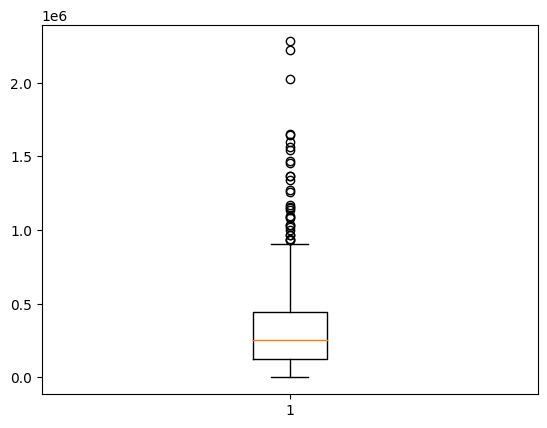

In [61]:
import matplotlib.pyplot as plt
plt.boxplot((df['유임승차'] + df['무임승차']))
plt.show()

* 그래프를 바탕으로 극단적으로 작은 값을 제외하는 것으로 결정했고 기준값을 25%로 정하기로 했음, 이 기준 이상은 유동인구가 많다, 고로 비율을 계산하는데 방해요소가 아니라고 판단됨. 25% 기준점은 12만명이므로 대략 10만명을 기준값으로 설정해서 필터링을 해보겠음.

In [63]:
df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='result', ascending=False)

,사용월,호선명,역ID,result,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
18,2023-06,2호선,209,0.956535,한양대,305324,337457,13874,14861,2023-07-03 08:56:50
565,2023-06,공항철도 1호선,4203,0.952169,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50
48,2023-06,2호선,239,0.950628,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50
120,2023-06,경부선,1001,0.940804,서울역,258515,80341,16266,3451,2023-07-03 08:56:50
567,2023-06,공항철도 1호선,4206,0.939833,마곡나루(서울식물원),272965,263113,17475,17871,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...,...
8,2023-06,1호선,158,0.569006,청량리(서울시립대입구),345435,338983,261650,265212,2023-07-03 08:56:50
594,2023-06,우이신설선,4705,0.568624,화계,58993,52227,44754,45633,2023-07-03 08:56:50
195,2023-06,경원선,1903,0.524259,도봉산,132984,74978,120677,97260,2023-07-03 08:56:50
9,2023-06,1호선,159,0.477172,동묘앞,143230,148422,156934,157665,2023-07-03 08:56:50


In [66]:
cond = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='result', ascending=False)
cond.head()

,사용월,호선명,역ID,result,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
18,2023-06,2호선,209,0.956535,한양대,305324,337457,13874,14861,2023-07-03 08:56:50
565,2023-06,공항철도 1호선,4203,0.952169,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50
48,2023-06,2호선,239,0.950628,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50
120,2023-06,경부선,1001,0.940804,서울역,258515,80341,16266,3451,2023-07-03 08:56:50
567,2023-06,공항철도 1호선,4206,0.939833,마곡나루(서울식물원),272965,263113,17475,17871,2023-07-03 08:56:50


In [68]:
#유임 승차 비율이 가장 높은 역은? 
for i in range(5):
    pla = cond['지하철역'].values[i]
    rate = cond['result'].values[i]
    print(f'유임승차 비율이 가장 높은 역은? {pla} {rate}%')



유임승차 비율이 가장 높은 역은? 한양대 0.9565348153810488%
유임승차 비율이 가장 높은 역은? 홍대입구 0.9521693034404621%
유임승차 비율이 가장 높은 역은? 홍대입구 0.9506278500780586%
유임승차 비율이 가장 높은 역은? 서울역 0.9408037673638279%
유임승차 비율이 가장 높은 역은? 마곡나루(서울식물원) 0.9398326676766285%


유임승차 비율이 가장 높은 역은? 한양대 2호선 95.65%

---

## 3. 유무임 승하차 인원이 가장 많은 역은 어디일까?
---
__유무임 승하차 인원이 가장 많은 역은 어디일까?__

유임 승차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾으면 되니까 다음과 같은 간단한 알고리즘을 생각할 수 있다.

1. 데이터를 읽어온다
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
3. 각각의 인원이 가장 많은 역을 출력한다.

In [9]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV.CSV', thousands=',')
df.head()

#데이터 전처리
cond = df.sort_values(by=['유임승차'], ascending=False)
cond


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
31,2023-06,2호선,222,강남,2123826,2064342,156377,136556,2023-07-03 08:56:50
25,2023-06,2호선,216,잠실(송파구청),2011091,1994423,213227,202257,2023-07-03 08:56:50
48,2023-06,2호선,239,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50
28,2023-06,2호선,219,삼성(무역센터),1476671,1490899,120364,112574,2023-07-03 08:56:50
41,2023-06,2호선,232,구로디지털단지,1461510,1438930,184022,185341,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...
474,2023-06,6호선,2649,신내,8,0,1,0,2023-07-03 08:56:50
331,2023-06,경의선,1296,계양,5,0,1,0,2023-07-03 08:56:50
517,2023-06,7호선,2753,까치울,2,0,0,0,2023-07-03 08:56:50
519,2023-06,7호선,2756,신중동,1,0,0,0,2023-07-03 08:56:50


In [16]:
#유임승차가 가장 많은 역
cond1 = df.sort_values(by=['유임승차'], ascending=False).iloc[0,[1,3,4]]
#유임하차가 가장 많은 역
cond2 = df.sort_values(by=['유임하차'], ascending=False).iloc[0,[1,3,5]]
#무임승차가 가장 많은 역
cond3 = df.sort_values(by=['무임승차'], ascending=False).iloc[0,[1,3,6]]
#무임하차가 가장 많은 역
cond4 = df.sort_values(by=['무임하차'], ascending=False).iloc[0,[1,3,7]]

In [20]:
cond1[0], cond1[1], cond1[2]

('2호선', '강남', 2123826)

# 유임승차: 2호선 강남 2073808
# 유임하차: 2호선 강남 2018576
# 무임승차: 1호선 종로 3가: 277589
# 무임하차: 1호선 제기동 282283

In [21]:
print(f'유임승차: {cond1[0]} {cond1[1]} {cond1[2]}명')
print(f'유임하차: {cond2[0]} {cond2[1]} {cond2[2]}명')
print(f'무임승차: {cond3[0]} {cond3[1]} {cond3[2]}명')
print(f'무임하차: {cond4[0]} {cond4[1]} {cond4[2]}명')

유임승차: 2호선 강남 2123826명
유임하차: 2호선 홍대입구 2092841명
무임승차: 1호선 종로3가 304455명
무임하차: 1호선 제기동 295752명


## 모든 역의 유무임 승하차 비율은 어떻게 될까
---
이번에는 데이터가 있는 모든 역에 대한 유무임 승하차 비율을 표현해보자.
4개역

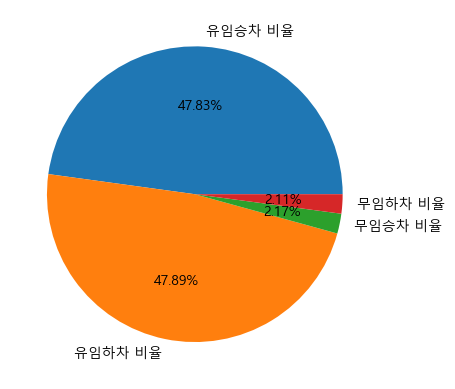

In [46]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV.CSV', thousands=',')
df.head()

#데이터 전처리
df.insert(5, '1_result', df['유임승차'] / (df['유임승차'] + df['무임승차']))
df.insert(7, '2_result', df['유임하차'] / (df['유임하차'] + df['무임하차']))
df.insert(9, '3_result', df['무임승차'] / (df['유임승차'] + df['무임승차']))
df.insert(11, '4_result', df['무임하차'] / (df['유임하차'] + df['무임하차']))

# 데이터 추출

# 유임승차 비율
df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='1_result', ascending=False)
a = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='1_result', ascending=False).iloc[0,5]
b = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='1_result', ascending=False).iloc[0,7]
c = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='1_result', ascending=False).iloc[0,9]
d = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='1_result', ascending=False).iloc[0,11]

# 폰트설정
plt.rc('font', family = "Malgun Gothic") 
plt.rcParams['axes.unicode_minus']=False

# 그래프 그리기
plt.pie([a,b,c,d], labels = ['유임승차 비율', '유임하차 비율', '무임승차 비율', '무임하차 비율'], autopct = '%.2f%%') # 소수점 2번째자리
plt.show()

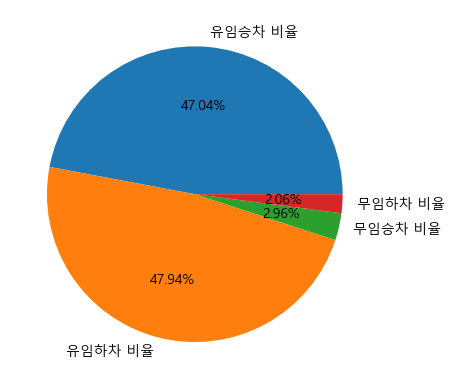

,사용월,호선명,역ID,지하철역,유임승차,1_result,유임하차,2_result,무임승차,3_result,무임하차,4_result,작업일시
120,2023-06,경부선,1001,서울역,258515,0.940804,80341,0.958815,16266,0.059196,3451,0.041185,2023-07-03 08:56:50
18,2023-06,2호선,209,한양대,305324,0.956535,337457,0.957819,13874,0.043465,14861,0.042181,2023-07-03 08:56:50
48,2023-06,2호선,239,홍대입구,1926011,0.950628,2092841,0.955673,100030,0.049372,97073,0.044327,2023-07-03 08:56:50
565,2023-06,공항철도 1호선,4203,홍대입구,392468,0.952169,385660,0.954066,19715,0.047831,18568,0.045934,2023-07-03 08:56:50
457,2023-06,6호선,2632,한강진,277187,0.938341,335518,0.948482,18214,0.061659,18224,0.051518,2023-07-03 08:56:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2023-06,1호선,158,청량리(서울시립대입구),345435,0.569006,338983,0.561049,261650,0.430994,265212,0.438951,2023-07-03 08:56:50
594,2023-06,우이신설선,4705,화계,58993,0.568624,52227,0.533691,44754,0.431376,45633,0.466309,2023-07-03 08:56:50
9,2023-06,1호선,159,동묘앞,143230,0.477172,148422,0.484901,156934,0.522828,157665,0.515099,2023-07-03 08:56:50
195,2023-06,경원선,1903,도봉산,132984,0.524259,74978,0.435316,120677,0.475741,97260,0.564684,2023-07-03 08:56:50


In [52]:
# 유임하차 비율
df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False)
a2 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False).iloc[0,5]
b2 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False).iloc[0,7]
c2 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False).iloc[0,9]
d2 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False).iloc[0,11]

# 폰트설정
plt.rc('font', family = "Malgun Gothic") 
plt.rcParams['axes.unicode_minus']=False

# 그래프 그리기
plt.pie([a2,b2,c2,d2], labels = ['유임승차 비율', '유임하차 비율', '무임승차 비율', '무임하차 비율'], autopct = '%.2f%%') # 소수점 2번째자리
plt.show()

df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='2_result', ascending=False)

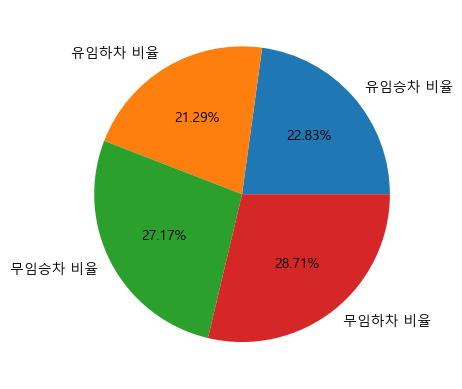

In [42]:
# 무임승차 비율
df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='3_result', ascending=False)
a3 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='3_result', ascending=False).iloc[0,5]
b3 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='3_result', ascending=False).iloc[0,7]
c3 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='3_result', ascending=False).iloc[0,9]
d3 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='3_result', ascending=False).iloc[0,11]

# 폰트설정
plt.rc('font', family = "Malgun Gothic") 
plt.rcParams['axes.unicode_minus']=False

# 그래프 그리기
plt.pie([a3,b3,c3,d3], labels = ['유임승차 비율', '유임하차 비율', '무임승차 비율', '무임하차 비율'], autopct = '%.2f%%') # 소수점 2번째자리
plt.show()


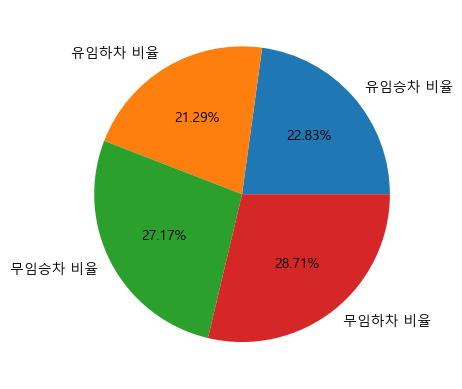

In [43]:
# 무임하차 비율
df[(df['유임하차'] + df['무임하차']) > 100000].sort_values(by='4_result', ascending=False)
a4 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='4_result', ascending=False).iloc[0,5]
b4 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='4_result', ascending=False).iloc[0,7]
c4 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='4_result', ascending=False).iloc[0,9]
d4 = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='4_result', ascending=False).iloc[0,11]

# 폰트설정
plt.rc('font', family = "Malgun Gothic") 
plt.rcParams['axes.unicode_minus']=False

# 그래프 그리기
plt.pie([a4,b4,c4,d4], labels = ['유임승차 비율', '유임하차 비율', '무임승차 비율', '무임하차 비율'], autopct = '%.2f%%') # 소수점 2번째자리
plt.show()

In [ ]:
# 파이차트 그리기
# 각 역마다 유무임 승하차 비율 시각화


```
**코드는 어떻게 보완하면 좋을까?**

1. 어떤 역에 대한 차트인지 정보가 부족하다.
2. 비율을 수치로 정확하게 나타내면 좋겠다.
3. 색상을 좀 더 예쁘게 바꾸고 싶을 수 있다.
```

In [ ]:
# plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
# #plt.rc('font', family='AppleGothic')     #맥
# plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

```
마지막으로 시각화한 자료를 이미지 파일로 저장하자. 
그래프를 이미지로 저장하려면 `savefig()` 함수를 사용하면 된다.
```

## 4. 그래프를 여러개 그리기